In [78]:
# merging sql data with pandas

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.getcwd()

df = pd.read_csv('/home/jupyter-jbatist48/JDL-SUM_23_PIZZA_PROJ/SQL_files/updated_sql.csv')
rain = pd.read_csv('/home/jupyter-jbatist48/JDL-SUM_23_PIZZA_PROJ/SQL_files/RAIN_FALL_2015_-_Sheet1.csv')
snow= pd.read_csv('/home/jupyter-jbatist48/JDL-SUM_23_PIZZA_PROJ/SQL_files/snowfall.csv')


In [152]:
# Month, Total Revenue, & Hour columns
df['month'] = df['date'].str[5:7]
df['month'] = df['month'].astype('int')
df['total_revenue'] = df['quantity'] * df['price']
df['time']= pd.to_datetime(df['time'])
df['hour']= pd.to_datetime(df['time']).dt.hour
df.head(5)

,quantity,date,time,size,pizza_type_id,price,category,ingredients,month,total_revenue,hour
0,1,2015-01-03,2023-06-26 14:22:10,M,hawaiian,13.25,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1,13.25,14
1,1,2015-01-03,2023-06-26 14:32:51,XL,the_greek,25.50,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",1,25.50,14
2,1,2015-01-03,2023-06-26 14:40:42,S,mediterraneo,12.00,Veggie,"Spinach, Artichokes, Kalamata Olives, Sun-drie...",1,12.00,14
3,1,2015-01-03,2023-06-26 14:48:45,M,spinach_fet,16.00,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G...",1,16.00,14
4,1,2015-01-03,2023-06-26 14:49:58,M,pepperoni,12.50,Classic,"Mozzarella Cheese, Pepperoni",1,12.50,14


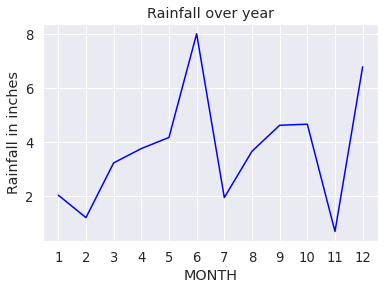

In [153]:
#Rain Graph
rainfall = rain.groupby('month').sum()
months = range(1,13)
plt.plot(months, rainfall['rainfall'], color='blue')
plt.title('Rainfall over year')
plt.xticks(months)
plt.ylabel('Rainfall in inches')
plt.xlabel('MONTH')
plt.show()




Text(0.5, 0, 'MONTH')

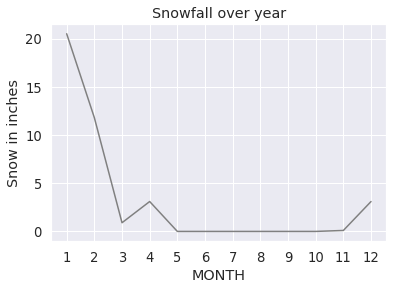

In [154]:
#Snow Graph
snowfall = snow.groupby('month').sum()
months = range(1,13)
plt.plot(months, snowfall['snow'], color='gray')
plt.title('Snowfall over year')
plt.xticks(months)
plt.ylabel('Snow in inches')
plt.xlabel('MONTH')



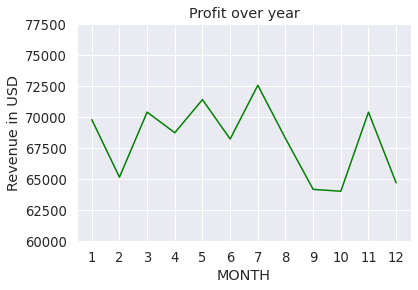

In [155]:
#Profit graph
results = df.groupby('month').sum()
months = range(1,13)
plt.plot(months, results['total_revenue'], color = 'green')
plt.title('Profit over year')
plt.ylim([60000, 77500])
plt.xticks(months)
plt.ylabel('Revenue in USD')
plt.xlabel('MONTH')
plt.show()




In [168]:
# WHAT WAS THE BEST Pizza FOR SALES?

PizzaSALES = df.groupby('pizza_type_id')[['total_revenue']].sum()
Top3S=PizzaSALES.sort_values(by='total_revenue', ascending=False)
Top3S.head(3)




,total_revenue
pizza_type_id,
thai_ckn,43434.25
bbq_ckn,42768.00
cali_ckn,41409.50


Text(0.5, 0, 'Hours')

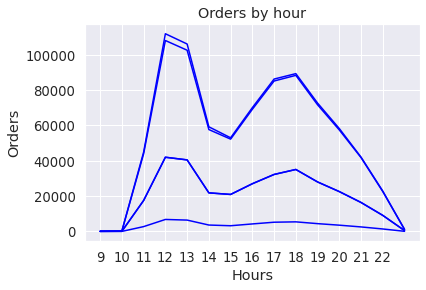

In [181]:
#Group by hours and return revenue of each hour. I had this correct before but its glitching now.. 
sumhours=df.groupby('hour').sum()
hours = range(9,23)
plt.plot(sumhours, color = 'blue')
plt.title('Orders by hour')
plt.xticks(hours)
plt.ylabel('Orders')
plt.xlabel('Hours')







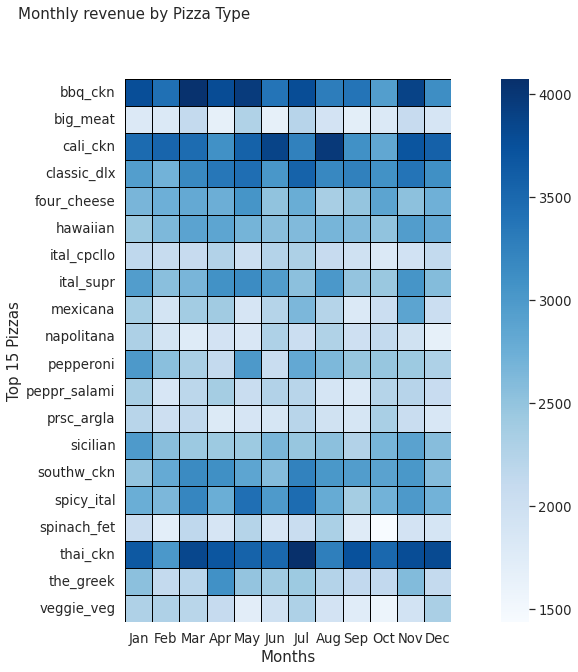

In [178]:
# Heatmap for pizza orders
top20_pizza = df['pizza_type_id'].value_counts().head(20).index.tolist()


df['Month'] = pd.to_datetime(df['date']).dt.month


filter_df = df[df['pizza_type_id'].isin(top20_pizza)]


group_df = filter_df.groupby(['pizza_type_id', 'Month'])['total_revenue'].sum().sort_values(ascending = True).reset_index()


result = group_df.pivot(index='pizza_type_id', columns='Month', values='total_revenue')



month_abbreviations = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

sns.set(font_scale=1.2)
result.columns = [month_abbreviations.get(month, '') for month in result.columns]

plt.figure(figsize=(18, 10))
ax = sns.heatmap(result, square=True, fmt="g", cmap='Blues', linewidths=1, linecolor='black')
plt.suptitle('Monthly revenue by Pizza Type', fontsize=15)

ax.set_ylabel('Top 15 Pizzas', size =15)
ax.set_xlabel('Months', size=15)


plt.show()


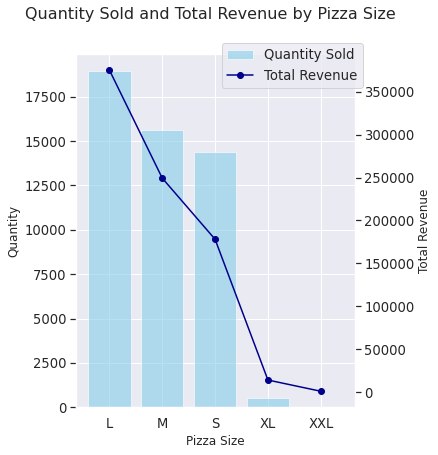

In [180]:
#calculate quantity and rev by pizza size
quantity_by_size = df.groupby('size')['quantity'].sum()
revenue_by_size =  df.groupby('size')['total_revenue'].sum()

#subplots w/ two axes
fig, ax1 = plt.subplots(figsize=(5,6.5))

#Bar plot for quantity
ax1.bar(quantity_by_size.index, quantity_by_size, color='skyblue', alpha=.6, label='Quantity Sold')
ax1.set_ylabel('Quantity Sold', fontsize=12)
ax1.set_xlabel('Pizza Size', fontsize=12)

#plot for revenue
ax2 = ax1.twinx()
ax2.plot(revenue_by_size.index, revenue_by_size, color='darkblue', marker='o', label='Total Revenue')
ax1.set_ylabel('Quantity', fontsize=12)
ax2.set_ylabel('Total Revenue' , fontsize=12)
#Title and legend
fig.suptitle('Quantity Sold and Total Revenue by Pizza Size', fontsize=16)
fig.legend(loc="upper left", bbox_to_anchor=(.5,1.05), bbox_transform=ax1.transAxes)
plt.grid(False)

plt.show()